# Great Learning Wine Recognition modeling

## Problem Statement:

#### `recongize the sample as Wine or not and classify the wine into category.`




## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [59]:
df = pd.read_csv('wine_data.csv', header=None)

In [60]:
df.head()

0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [61]:
# Add column headers
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
              'OD280/OD315 of diluted wines', 'Proline']

df.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [62]:
df.shape

(178, 14)

In [65]:
df.describe().T

count        mean         std     min       25%  \
Alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
Malic acid                    178.0    2.336348    1.117146    0.74    1.6025   
Ash                           178.0    2.366517    0.274344    1.36    2.2100   
Alcalinity of ash             178.0   19.494944    3.339564   10.60   17.2000   
Magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
Total phenols                 178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid phenols          178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
Color intensity               178.0    5.058090    2.318286    1.28    3.2200   
Hue                           178.0    0.957449    0.228572    0.48    0.7825   
OD280/OD315 of diluted wines  178.0    2.611685    0.709990    1.27    1.9375   
Proline                       178.0  746.893258  314.907474  278.00  500.5000   
Class                         178.0    1.938202    0.775035    1.00    1.0000   

                                  50%       75%      max  
Alcohol                        13.050   13.6775    14.83  
Malic acid                      1.865    3.0825     5.80  
Ash                             2.360    2.5575     3.23  
Alcalinity of ash              19.500   21.5000    30.00  
Magnesium                      98.000  107.0000   162.00  
Total phenols                   2.355    2.8000     3.88  
Flavanoids                      2.135    2.8750     5.08  
Nonflavanoid phenols            0.340    0.4375     0.66  
Proanthocyanins                 1.555    1.9500     3.58  
Color intensity                 4.690    6.2000    13.00  
Hue                             0.965    1.1200     1.71  
OD280/OD315 of diluted wines    2.780    3.1700     4.00  
Proline                       673.500  985.0000  1680.00  
Class                           2.000    3.0000     3.00

In [66]:
# Move the 'Class' column to the last position
cols = list(df.columns)
cols.remove('Class')
df = df[cols + ['Class']]
df.head(100)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0     14.23        1.71  2.43               15.6        127           2.80   
1     13.20        1.78  2.14               11.2        100           2.65   
2     13.16        2.36  2.67               18.6        101           2.80   
3     14.37        1.95  2.50               16.8        113           3.85   
4     13.24        2.59  2.87               21.0        118           2.80   
..      ...         ...   ...                ...        ...            ...   
95    12.47        1.52  2.20               19.0        162           2.50   
96    11.81        2.12  2.74               21.5        134           1.60   
97    12.29        1.41  1.98               16.0         85           2.55   
98    12.37        1.07  2.10               18.5         88           3.52   
99    12.29        3.17  2.21               18.0         88           2.85   

    Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
..         ...                   ...              ...              ...   ...   
95        2.27                  0.32             3.28             2.60  1.16   
96        0.99                  0.14             1.56             2.50  0.95   
97        2.50                  0.29             1.77             2.90  1.23   
98        3.75                  0.24             1.95             4.50  1.04   
99        2.99                  0.45             2.81             2.30  1.42   

    OD280/OD315 of diluted wines  Proline  Class  
0                           3.92     1065      1  
1                           3.40     1050      1  
2                           3.17     1185      1  
3                           3.45     1480      1  
4                           2.93      735      1  
..                           ...      ...    ...  
95                          2.63      937      2  
96                          2.26      625      2  
97                          2.74      428      2  
98                          2.77      660      2  
99                          2.83      406      2  

[100 rows x 14 columns]

## Handling Outliers
The dataset has no missing value, we have to check for outliers only. Check for outliers using box plot

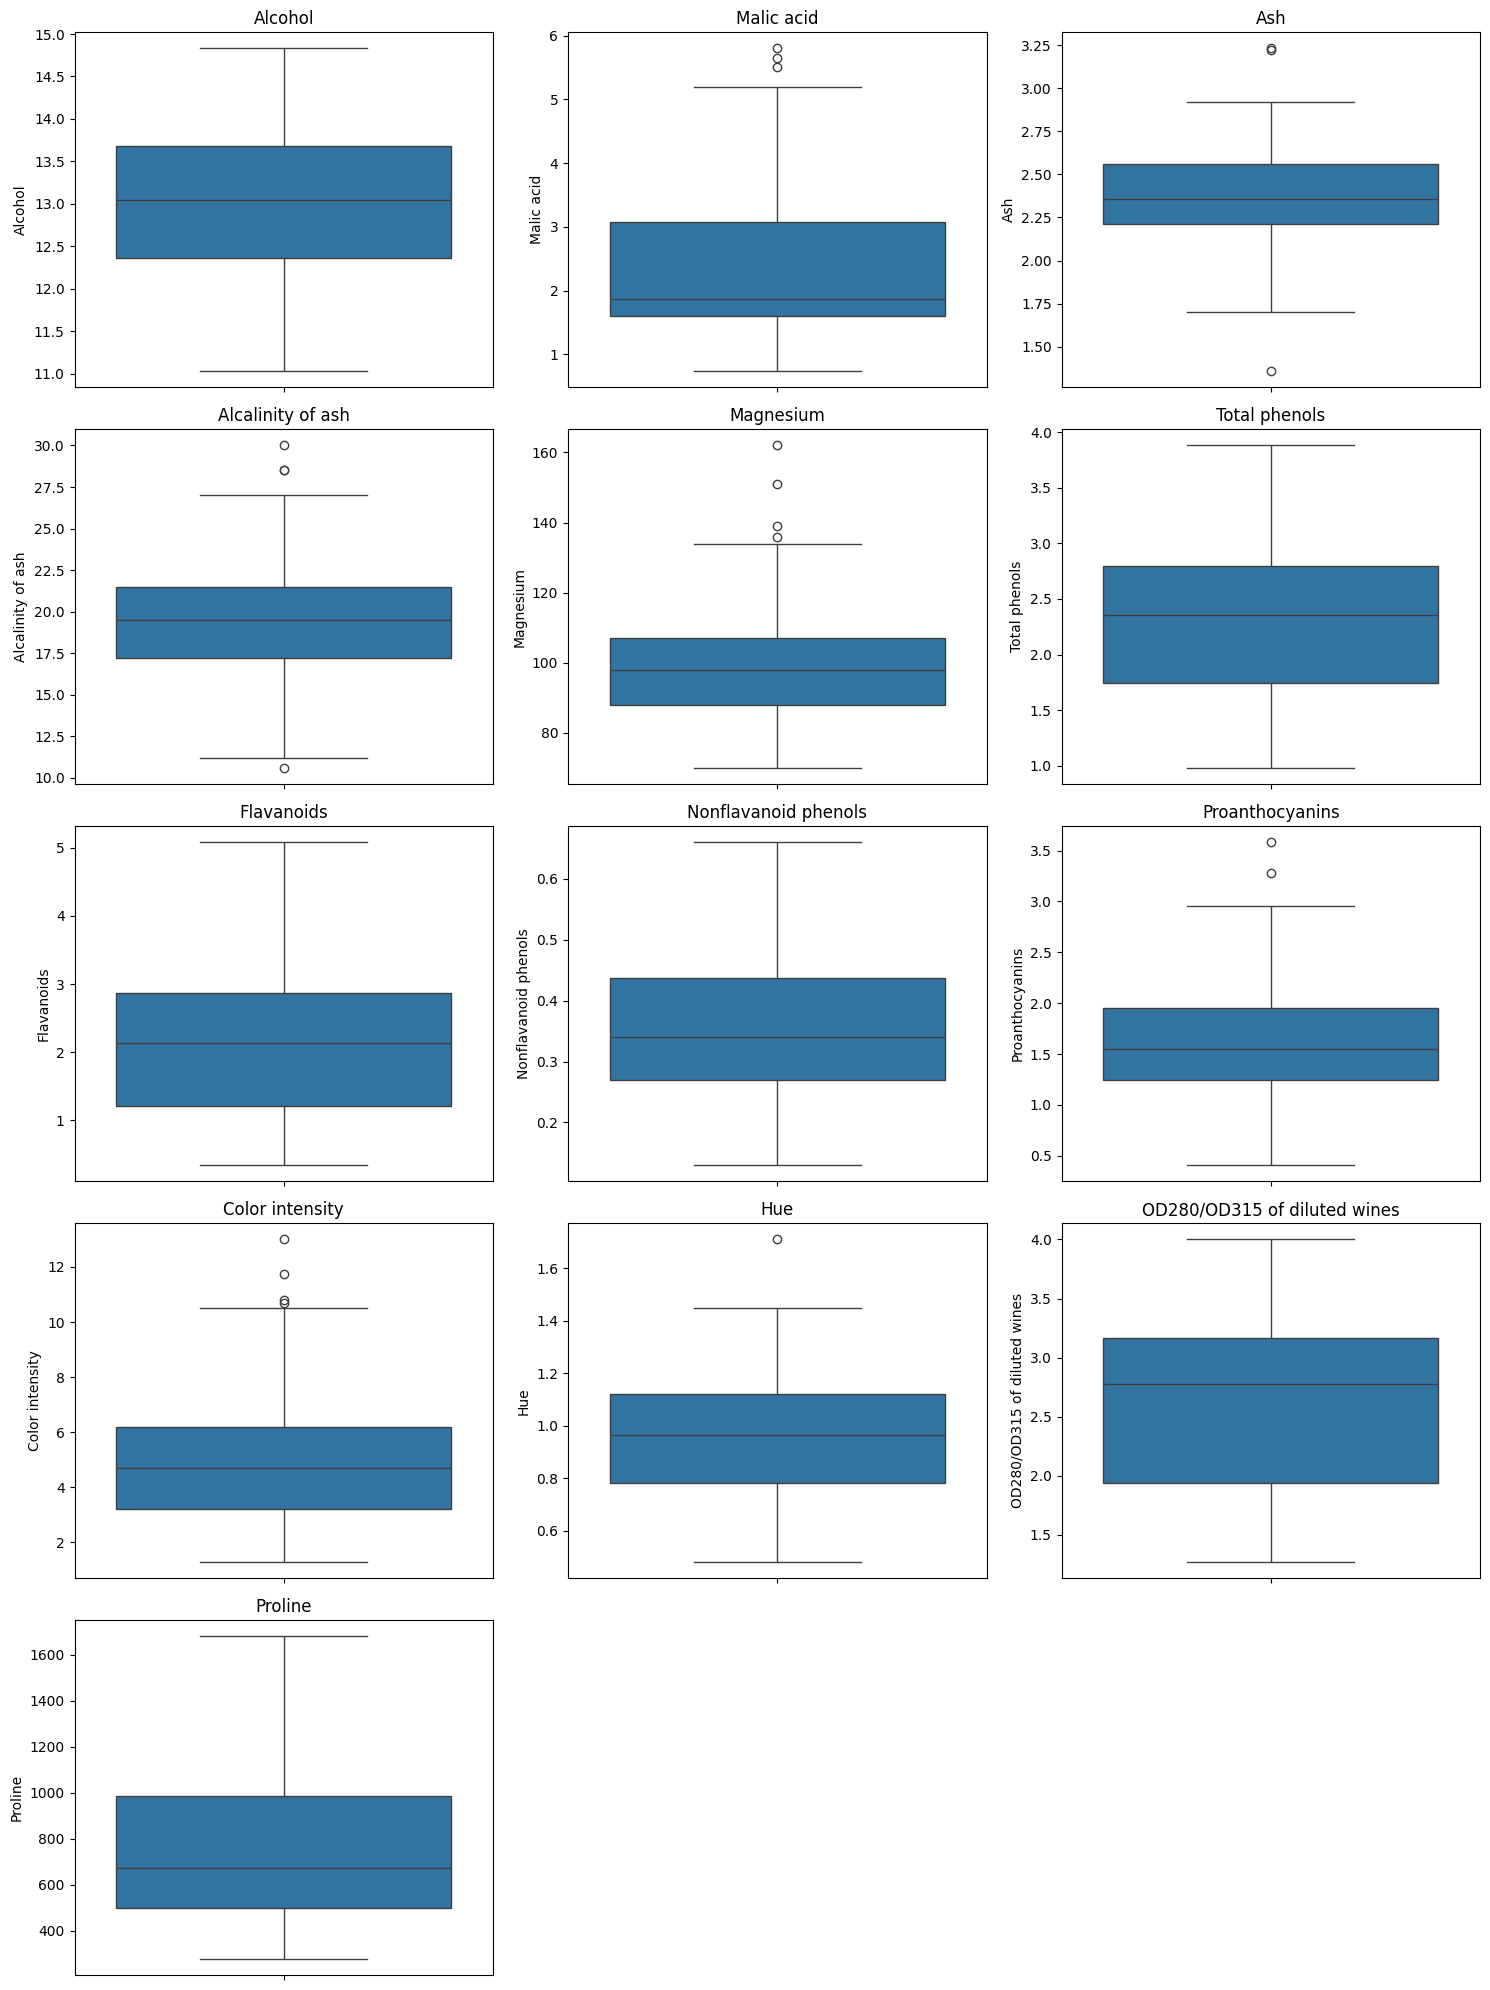

In [68]:
plt.figure(figsize=(15, 20))  # Adjusting figure size
for i, col in enumerate(df.columns[:-1]):  # Exclude the last column ('Class') which is categorical
    plt.subplot(5, 3, i+1)  # Adjusting subplot grid
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Only some features have outliers, we will handle this by clip()

In [69]:
def handle_outliers_clip(df, column, lower_percentile=2, upper_percentile=98):
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

clms = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue','Class']
# Example usage:
for col in df.columns[:-1]: # Apply to all columns except the 'Class' column
    df = handle_outliers_clip(df, col)

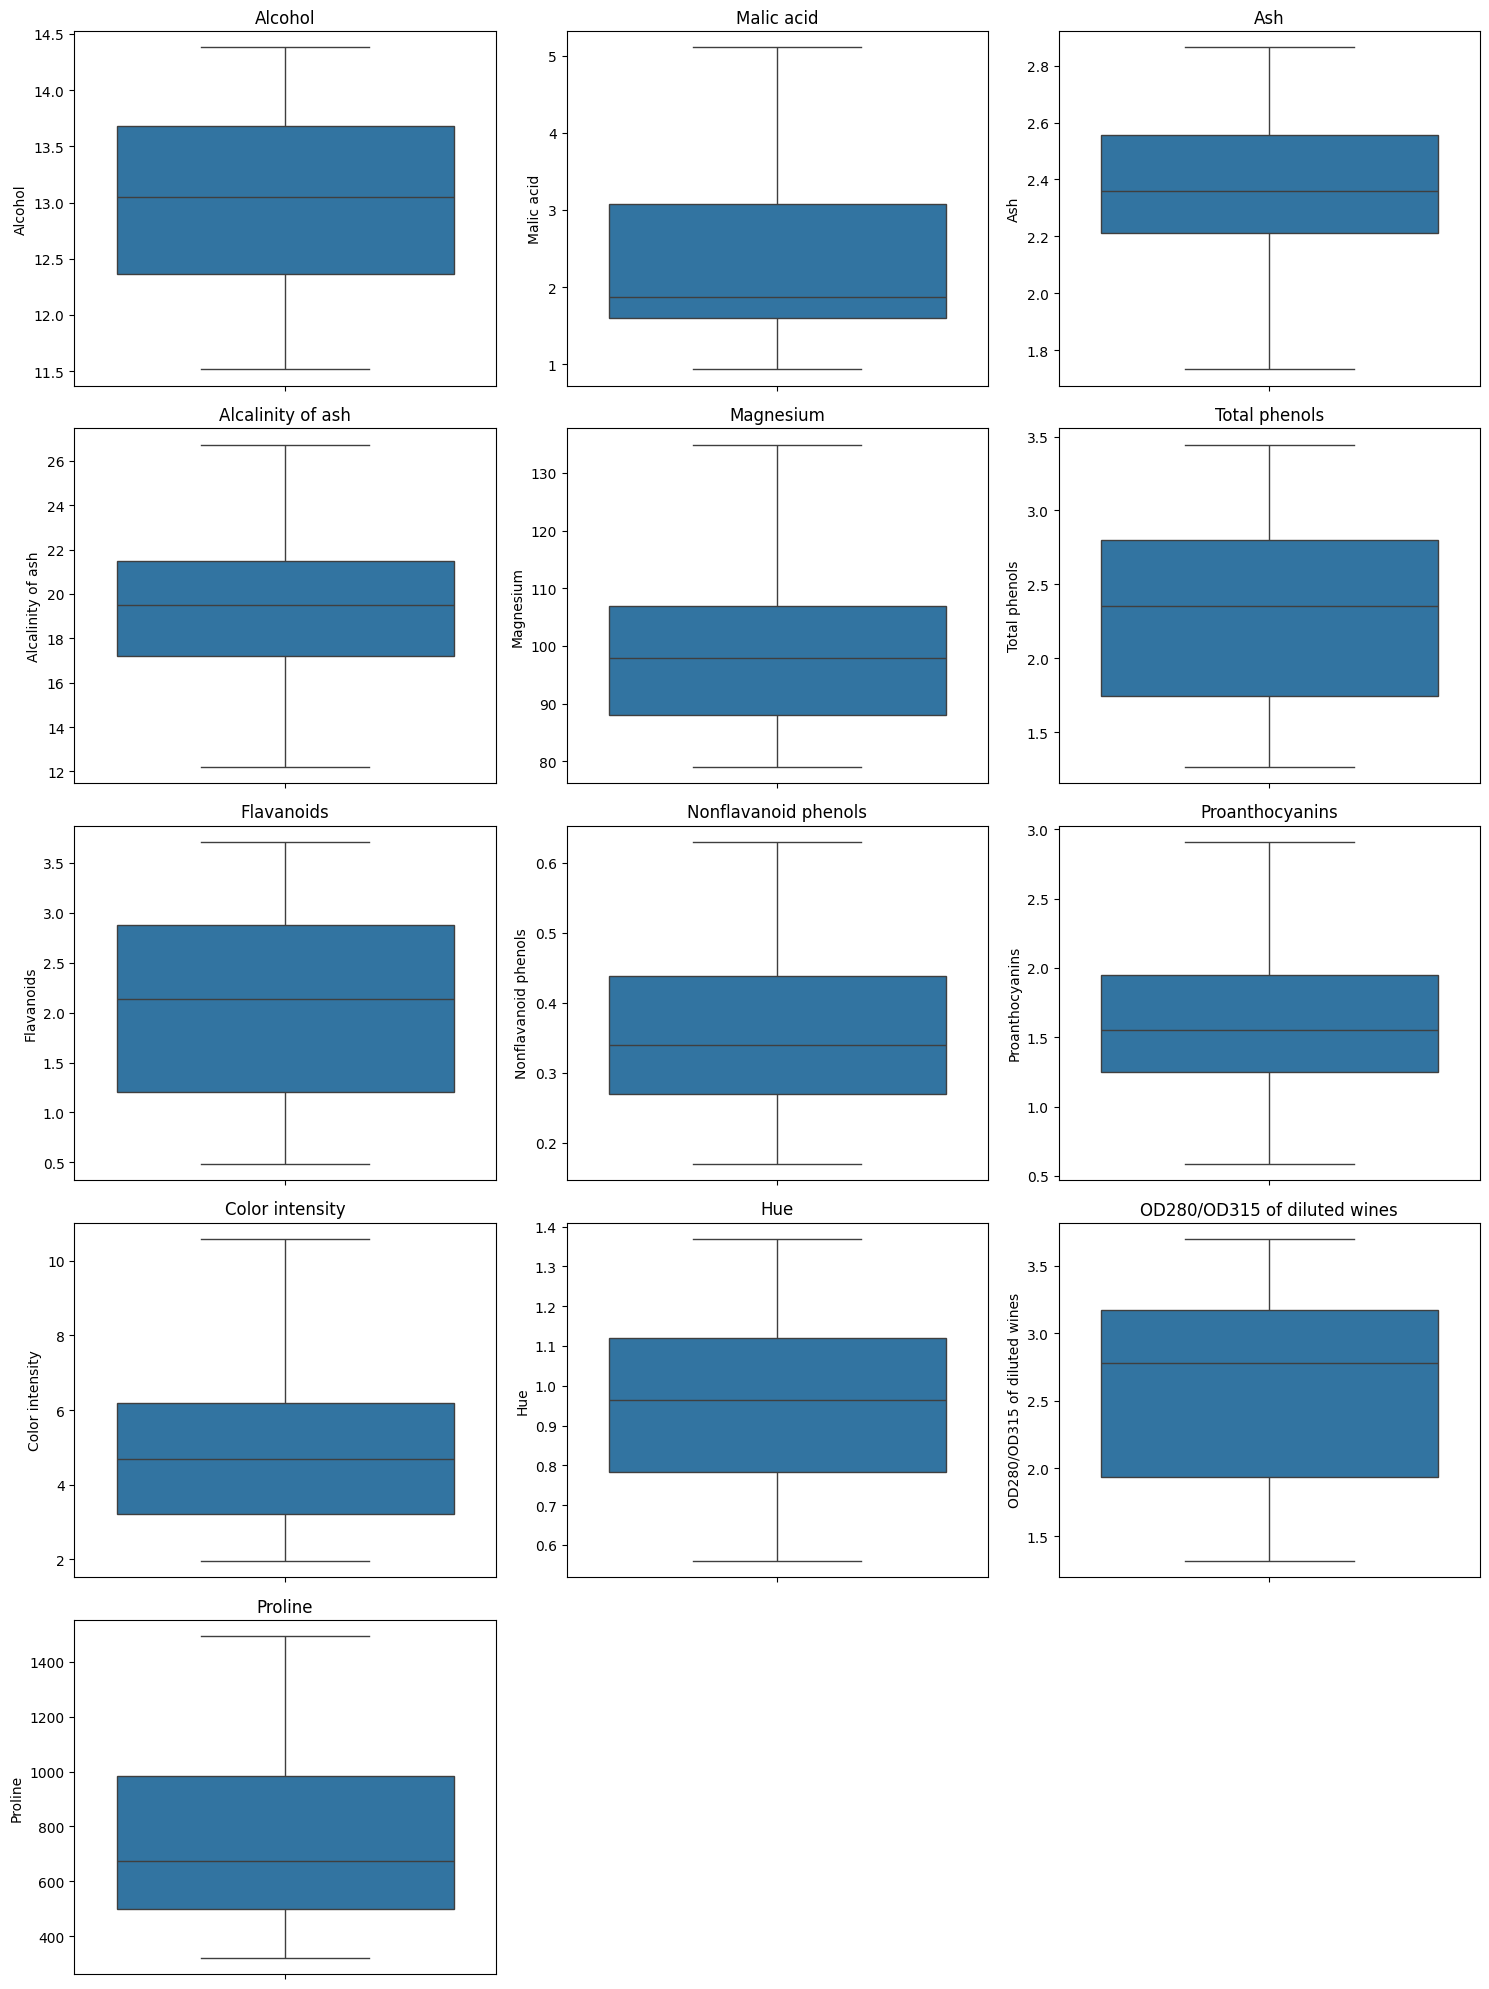

In [70]:
plt.figure(figsize=(15, 20))  # Adjusting figure size
for i, col in enumerate(df.columns[:-1]):  # Exclude the last column ('Class') which is categorical
    plt.subplot(5, 3, i+1)  # Adjusting subplot grid
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Understand the data and Model Selection

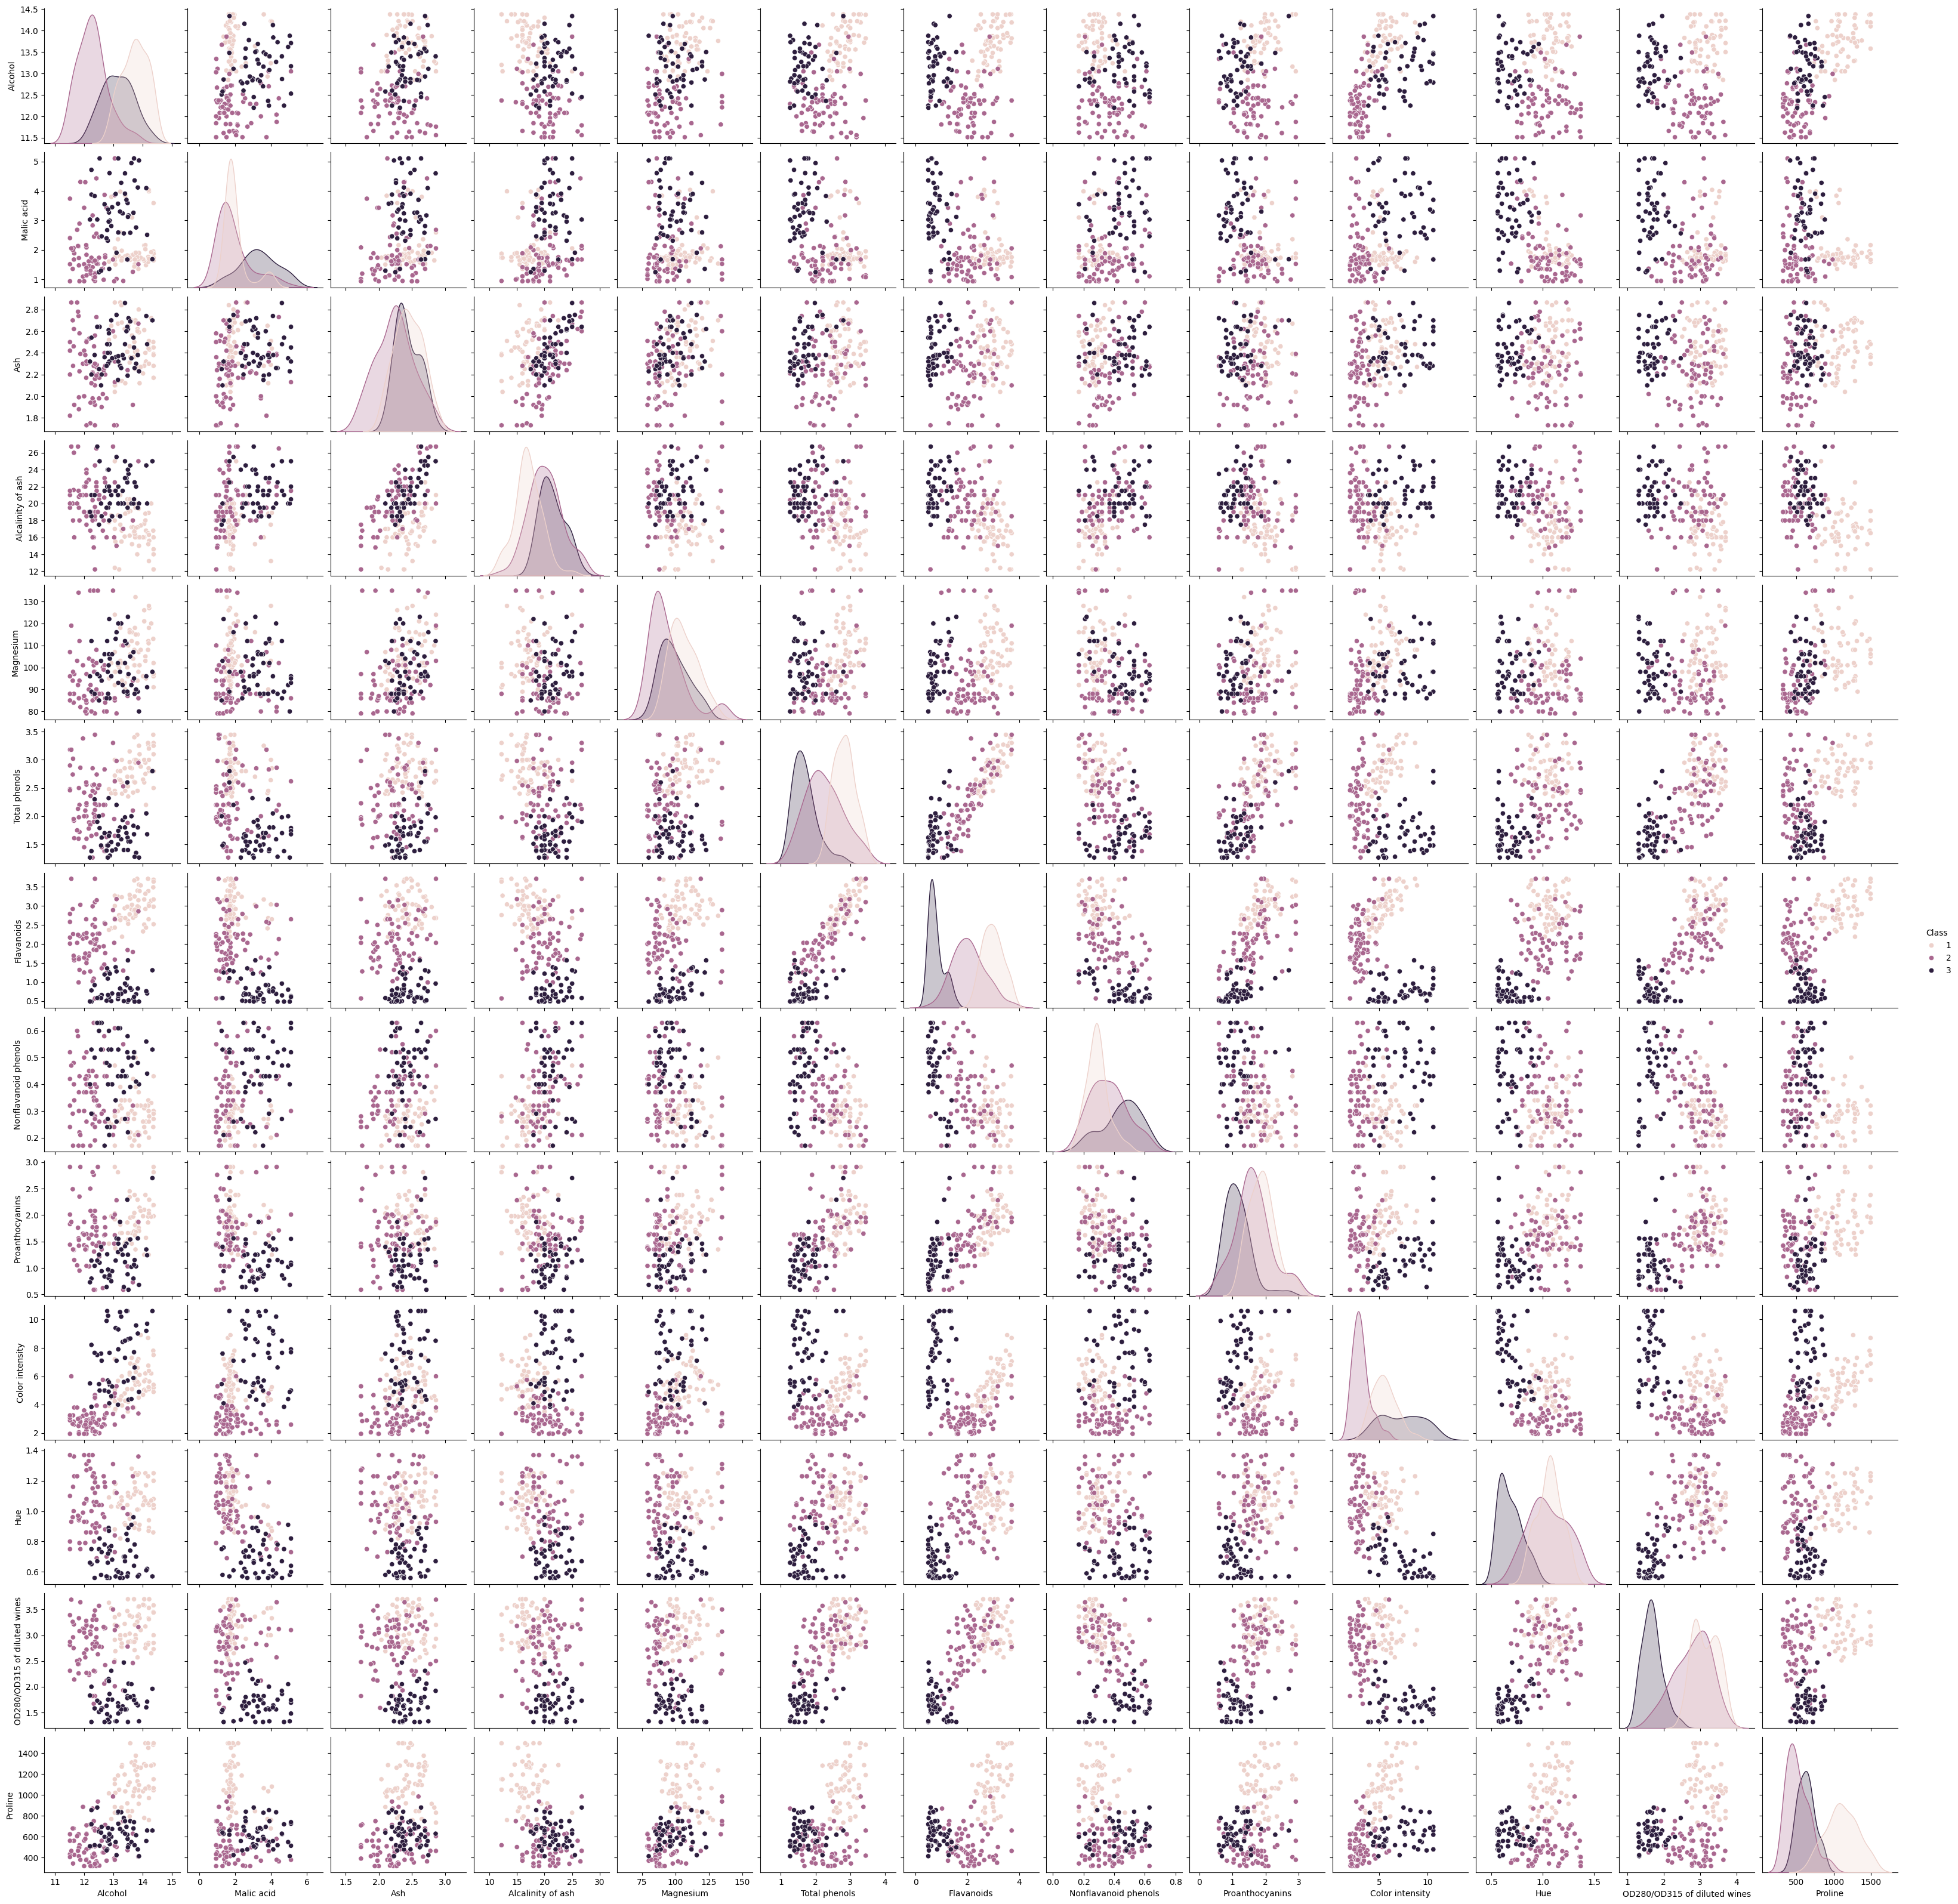

In [45]:
sns.pairplot(df, hue='Class')
plt.show()

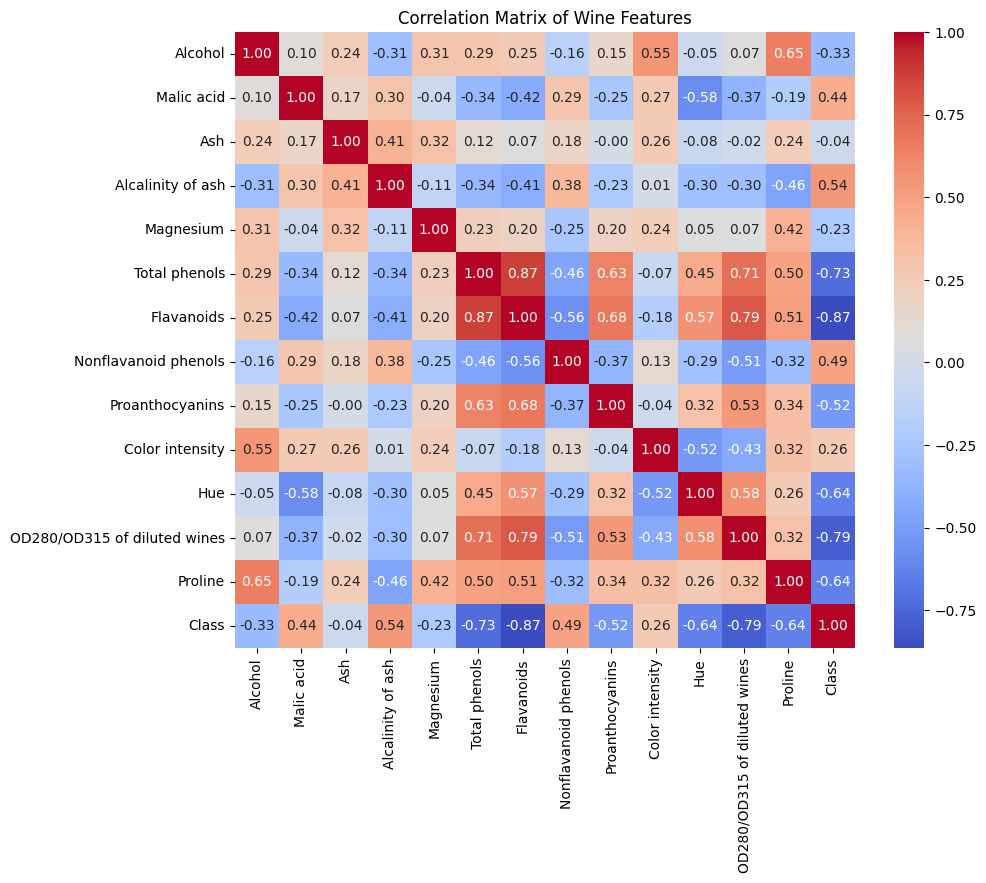

In [71]:
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

All features are strongly correlated to class, Which is good for modeling

## Split Data for Model

In [72]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Setting random_state for reproducibility
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (142, 13), (142,)
Testing data shape: (36, 13), (36,)


## Train Model

In [73]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=10000) # Increased max_iter to ensure convergence

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Evaluation

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


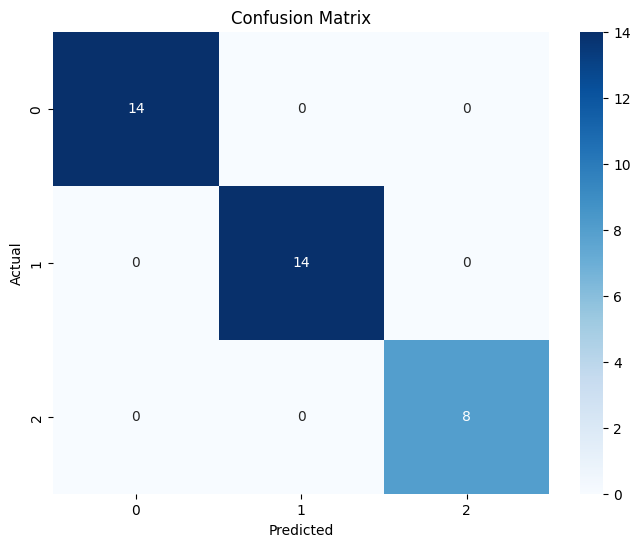

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# You can further analyze the confusion matrix with a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Check for Overfit or Underfit

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Analyze the results
# If accuracy is low, the model might be underfitting
# Check the classification report for precision, recall, F1-score, and support.
# Low values across classes might suggest underfitting.
# A confusion matrix can reveal patterns of misclassifications
# which might provide insights into underfitting or overfitting.

# Further investigation:
# Try more complex models (e.g., SVM, Random Forest) to see if accuracy improves significantly.
# If it does, the original model might have been underfitting.
# If accuracy improvement is marginal, consider regularization or feature engineering.
# If accuracy on the training set is very high but low on the test set, the model is overfitting.

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Train the data with svm

SVM Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


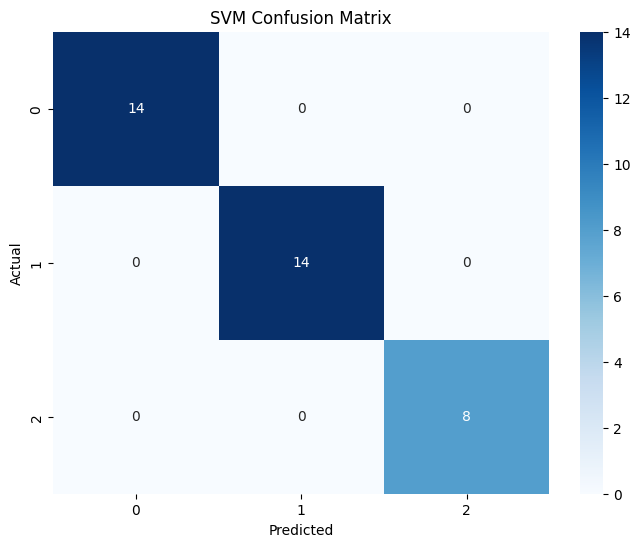

In [77]:
# prompt: train the data with svm

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1)  # You can experiment with different kernels and C values

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

print(classification_report(y_test, y_pred_svm))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

## train the data for forest tree algorith

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Random Forest Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


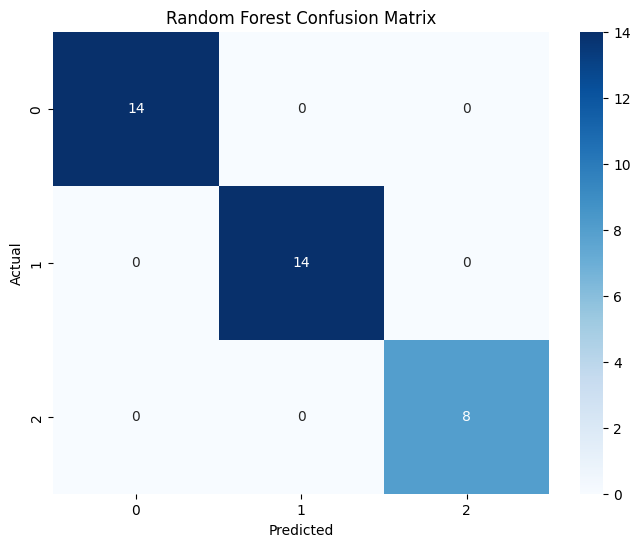

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## cross validate the forest tree model

In [79]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.97222222 0.94444444 0.94444444 0.97142857 1.        ]
Mean CV Score: 0.9665079365079364
Standard Deviation of CV Scores: 0.020746948644437477


## Predict the model for test values

In [80]:
new_data = pd.DataFrame({
    'Alcohol': [13.2, 12.5],
    'Malic acid': [1.78, 1.9],
    'Ash': [2.14, 2.5],
    'Alcalinity of ash': [11.2, 13.0],
    'Magnesium': [100, 115],
    'Total phenols': [2.65, 2.8],
    'Flavanoids': [2.76, 3.1],
    'Nonflavanoid phenols': [0.26, 0.24],
    'Proanthocyanins': [1.28, 1.1],
    'Color intensity': [4.38, 4.7],
    'Hue': [1.05, 1.2],
    'OD280/OD315 of diluted wines': [3.40, 3.6],
    'Proline': [1050, 1200]
})

# Make predictions
new_predictions = rf_model.predict(new_data)
print("Predictions for new data:", new_predictions)

# You can also get probabilities for each class
new_probabilities = rf_model.predict_proba(new_data)
print("Probabilities for new data:\n", new_probabilities)

Predictions for new data: [1 1]
Probabilities for new data:
 [[0.99 0.01 0.  ]
 [0.7  0.29 0.01]]


## Conclusion:

* All Three models are working 100 accurate, as the data is small and cleected by expert carefully, and then preocessed by the data professionals. it is producing the best trained model.